<a href="https://colab.research.google.com/github/mkgreen/Logistic_Regression_Portuguese_Banking_Campaign/blob/main/Logistic_Regression_Portu_Banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section I: Data Loading
1. Load the dataset into the notebook
2. Explore and make note of Attribute Information from UCI
3. What is the significance of the y column in the dataset and what are the value counts of the y column?
4. What is the ratio of the two classes ? Are they balanced ?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas._libs.hashtable import value_count
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from textwrap import wrap

df = pd.read_csv('/content/portu_banking_final.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 41188 rows and 21 columns.


In [4]:
columns= df.columns.values
print("Attributes included in dataset:")
# print()
print(columns)

Attributes included in dataset:
['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'
 'month' 'day_of_week' 'duration' 'campaign' 'pdays' 'previous' 'poutcome'
 'emp_var_rate' 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed'
 'y']


**Dataset Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required in order to access if the product (bank term deposit) would be successfully subscribed or not.

Represented in the 'y' column as 
- 0: not subscribed
- 1: successfully subscribed

In this data analysis, the variable 'y' will also be referred to as the output variable or desired target.

# [Attribute Information:](https://https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

Input variables:
###bank client data:
1. **age:** (numeric)
2. **job:** type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
3. **marital:** marital status (categorical: divorced, married, single, unknown; *note: 'divorced' can mean divorced or widowed*)
4. **education:** (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)
5. **default:** has credit in default? (categorical: no, yes, unknown)
6. **housing**: has housing loan? (categorical: no,yes, unknown)
7. **loan:** has personal loan? (categorical: no, yes, unknown)

###related with the last contact of the current campaign:
8. **contact:** contact communication type (categorical: cellular, telephone)
9. **month:** last contact month of year (categorical: jan, feb, mar, ..., nov, dec)
10. **day_of_week:** last contact day of the week (categorical: mon, tue, wed, thu, fri) 
11. **duration:** last contact duration, in seconds (numeric). ***Important note:*** *this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*

###other attributes:
12. **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; **999 means client was not previously contacted**)
14. **previous:** number of contacts performed before this campaign and for this client (numeric)
15. **poutcome:** outcome of the previous marketing campaign (categorical: failure, nonexistent, success)

###social and economic context attributes:
16. **emp_var_rate:** employment variation rate - quarterly indicator (numeric)
17. **cons_price_idx:** consumer price index - monthly indicator (numeric)
18. **cons_conf_idx:** consumer confidence index - monthly indicator (numeric)
19. **euribor3m:** euribor 3 month rate - daily indicator (numeric)
20. **nr_employed:** number of employees - quarterly indicator (numeric)

###Output variable (desired target):
21. **y:** has the client subscribed a term deposit? (binary: yes = 1,no = 0)

In [5]:
miss_val = df.isna().sum()

print("Missing Value Count by Feature:")
print("-"*31)
print(miss_val)

miss_val_count = miss_val.sum()

if miss_val_count == 0:
  print()
  print("There are no missing values in the dataset.")
else:
  print()
  print(f"There are {miss_val_count} missing values in this dataset.")

Missing Value Count by Feature:
-------------------------------
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

There are no missing values in the dataset.


#Section II : Data Cleaning
Since this is real world data , A good practice is to make sure the dataset is devoid of any nuances

1. Get the dtypes of all the columns of our dataset
2. Refering to the UCI data description , explore the data in your columns and check if there are any errors
3. Make note of the deviation in the dataset compared to the description provided by UCI
4. Using Data Cleaning principles you learned from Pandas Tutorial) figure out the best ways to get rid of the dirty data 
5. Print the cleaned data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

The Age column is stored as an object datatype when it should be stored as an integer.
###Converting the age datatype:


In [7]:
df1=df

In [8]:
df1.age.unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [9]:
df1["age"] = df1["age"].replace({"35-30":"33", "30-35":"33", "25-30":"28","18-25":"22","30-32":"31","50-55":"53","45-50":"48","20-25":"23","20-40":"30","35-40":"38","30-40":"35"})

In [10]:
df1['age'] = df1['age'].astype(str).astype(int)

In [11]:
df1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

The 'y' column is stored as an integer datatype when it should be stored as a boolean datatype.

###Converting the 'y' datatype:

In [12]:
df1['y'] = df1['y'].astype(float).astype(bool)

In [13]:
df1.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                    bool
dtype: object

In [14]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,False
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,False
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,True
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,False
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,True


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


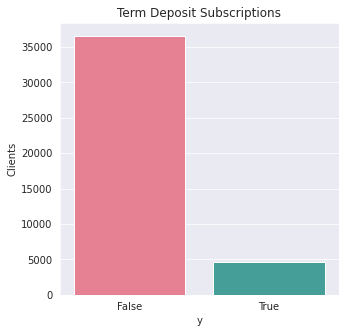

11.27% of clients successfully subscribed, 
compared to the 88.73% of clients that are not subscribed.

Clients totals of term deposit subscriptions:
---------------------------------------------
False    36548
True      4640
Name: y, dtype: int64


In [15]:
# storing percentage values of 'y' results
sub_count = df1['y'].sum()
not_sub_count = df1.shape[0] - sub_count 

percent_subscribed = ((sub_count/df1.shape[0])*100).round(2)
percent_not_subs = ((not_sub_count/df1.shape[0])*100).round(2)

sns.set_style('darkgrid')
plt.figure(figsize = (5,5))
sns.countplot(df['y'], alpha = 1, palette="husl")
plt.title('Term Deposit Subscriptions')
plt.ylabel('Clients')
plt.show()

print(f"{percent_subscribed}% of clients successfully subscribed, ")
print(f"compared to the {percent_not_subs}% of clients that are not subscribed.")
print()
print("Clients totals of term deposit subscriptions:")
print("-"*45)
print(df1['y'].value_counts())

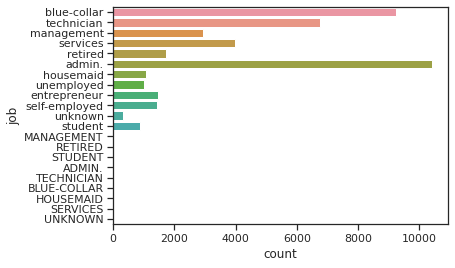

In [16]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=df1)

In [17]:
df1.job.value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
MANAGEMENT           1
TECHNICIAN           1
BLUE-COLLAR          1
HOUSEMAID            1
UNKNOWN              1
Name: job, dtype: int64

In [18]:
df1 = df1.replace(['RETIRED','SERVICES','STUDENT', 'ADMIN.','MANAGEMENT','TECHNICIAN','BLUE-COLLAR','HOUSEMAID','UNKNOWN'],['retired','services','student','admin.','management','technician','blue-collar','housemaid','unknown'])

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64



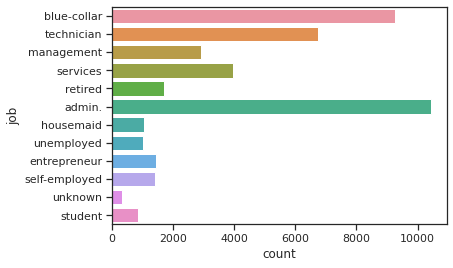

In [19]:
print(df1.job.value_counts())
print()
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=df1)

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

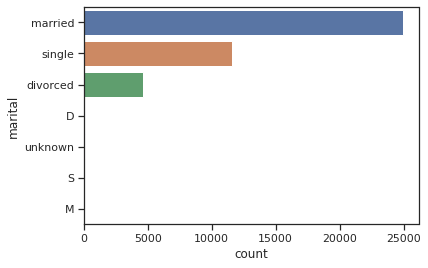

In [20]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='marital', data=df1)
df1.marital.value_counts()

In [21]:
df1 = df1.replace(['M','D','S'],['married','divorced','single'])

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

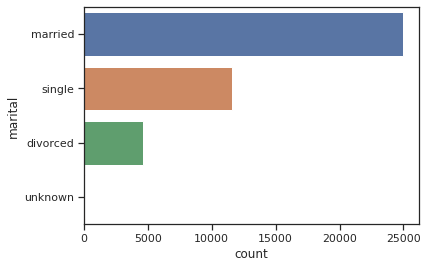

In [22]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='marital', data=df1)
df1.marital.value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

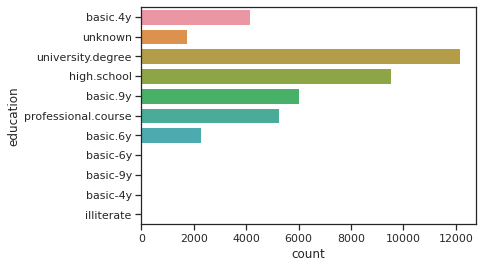

In [23]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='education', data=df1)
df1.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

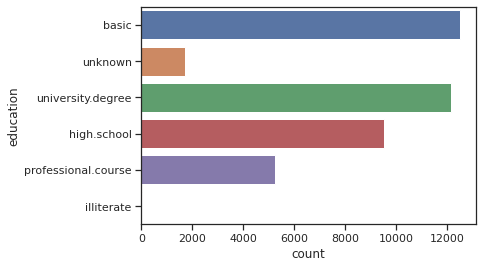

In [24]:
df1.replace(['basic-4y','basic-9y','basic-6y','basic.9y', 'basic.6y', 'basic.4y'],'basic',inplace=True)

sns.set(style="ticks", color_codes=True)
sns.countplot(y='education', data=df1)
df1.education.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

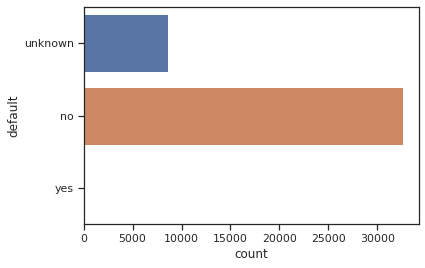

In [25]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='default', data=df1)
df1.default.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

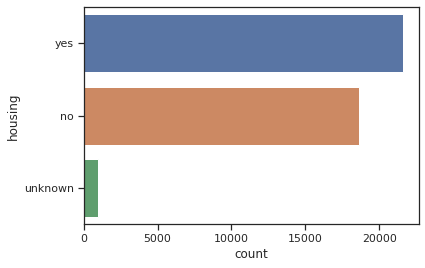

In [26]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='housing', data=df1)
df1.housing.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

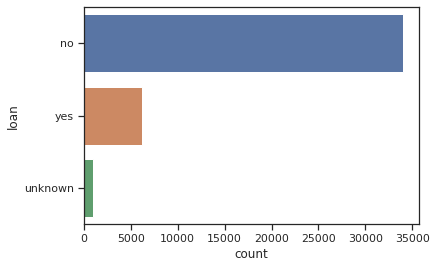

In [27]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='loan', data=df1)
df1.loan.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

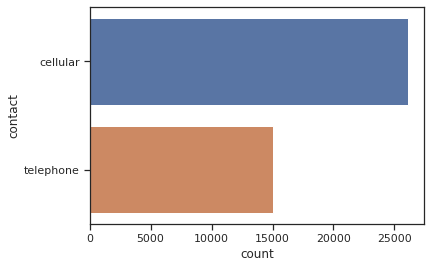

In [28]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='contact', data=df1)
df1.contact.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

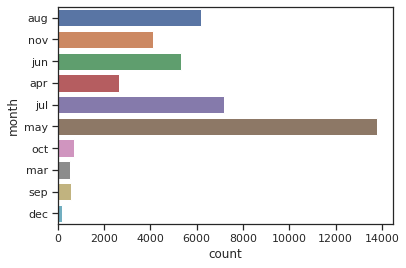

In [29]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='month', data=df1)
df1.month.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

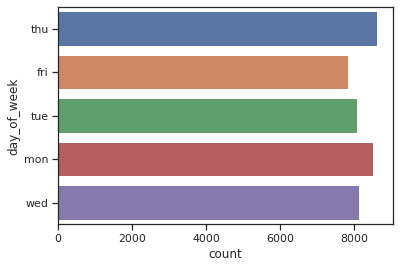

In [30]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='day_of_week', data=df1)
df1.day_of_week.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

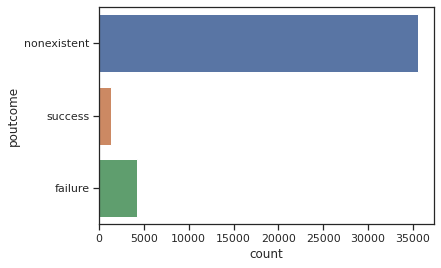

In [31]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='poutcome', data=df1)
df1.poutcome.value_counts()

In [32]:
# pd.DataFrame.boxplot(df1, column='pdays', grid=False,figsize=None,)

df1.pdays.value_counts()


999.0     39668
3.0         439
6.0         412
4.0         118
9.0          64
2.0          61
7.0          60
12.0         58
10.0         52
5.0          46
13.0         36
11.0         28
1.0          26
15.0         24
14.0         20
8.0          18
0.0          15
16.0         11
17.0          8
18.0          7
9999.0        5
19.0          3
22.0          3
21.0          2
26.0          1
20.0          1
25.0          1
27.0          1
Name: pdays, dtype: int64

In [33]:
df1["pdays"] = df1["pdays"].replace({9999.0:999.0})

pdays value counts:

999.0    39673
3.0        439
6.0        412
4.0        118
9.0         64
2.0         61
7.0         60
12.0        58
10.0        52
5.0         46
13.0        36
11.0        28
1.0         26
15.0        24
14.0        20
8.0         18
0.0         15
16.0        11
17.0         8
18.0         7
19.0         3
22.0         3
21.0         2
26.0         1
20.0         1
25.0         1
27.0         1
Name: pdays, dtype: int64



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


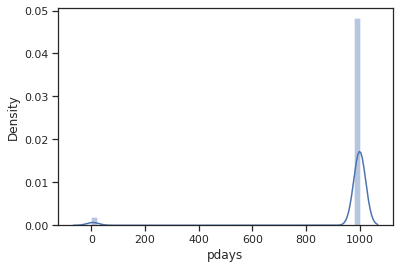

In [34]:
print('pdays value counts:')
print()
print(df1['pdays'].value_counts())
print()
sns.distplot(df1['pdays'])

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


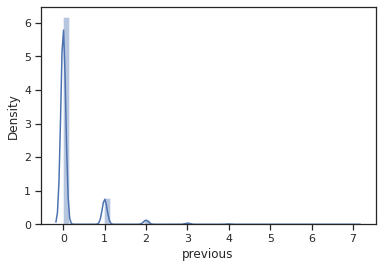

In [35]:
print(df1['previous'].value_counts())
sns.distplot(df1['previous'])

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp_var_rate, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


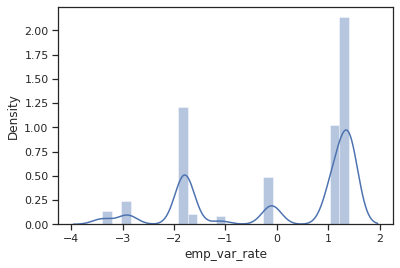

In [36]:
print(df1['emp_var_rate'].value_counts())
sns.distplot(df1['emp_var_rate'])

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons_price_idx, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


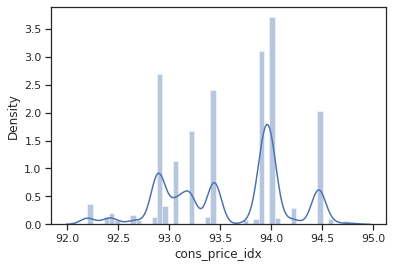

In [37]:
print(df1['cons_price_idx'].value_counts())
sns.distplot(df1['cons_price_idx'])

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.743       1
3.901       1
3.853       1
0.969       1
3.282       1
Name: euribor3m, Length: 316, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


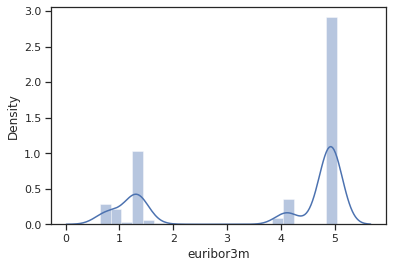

In [38]:
print(df1['euribor3m'].value_counts())
sns.distplot(df1['euribor3m'])

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr_employed, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


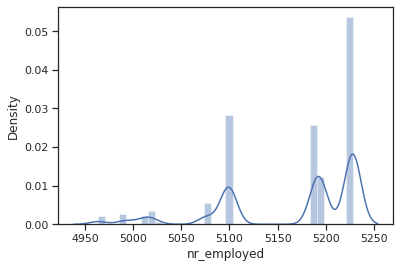

In [39]:
print(df1['nr_employed'].value_counts())
sns.distplot(df1['nr_employed'])

In [40]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,False
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,False
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,True
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,False
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,True


#Section III : Exploring data with Group by
Exploring the data with Group by
Using the groupby function on the mean of the following features
1. y
2. job
3. marital
4. education

(make note of what you learn from the outputs)

In [41]:
df2 = df1

In [42]:
df2.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
False,39.910830,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
True,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [43]:
df2.groupby('job').mean()
# ['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown']

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187008,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555327,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.360465,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.947924,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926682,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [44]:
df2.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899176,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.306924,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158195,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [45]:
df2.groupby('education').mean() 
# ['basic','high.school','illiterate', 'professional.course','university.degree','unknown']']

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic,42.164069,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.079916,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.878041,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


#Section III : Exploratory Data Analysis
Let us put Matplotlib to use

1. Create ***bar graphs to the frequency of purchase with respect to the job , martial etc***
2. **Also create stacked bars** to same data columns with respect to
3. Explore the age column using a histogram and **note down your observations**

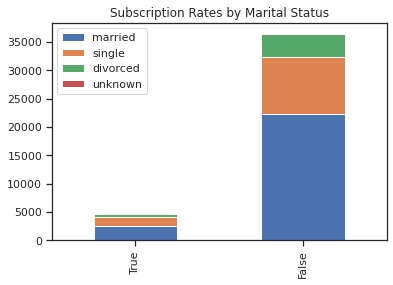

In [46]:
# Stacked barplot with pandas
subscribed = df2.loc[df2['y']==True, :]['marital'].value_counts()
not_subscribed = df2.loc[df2['y']==False, :]['marital'].value_counts()
df_plot  = pd.DataFrame([subscribed,not_subscribed])
df_plot.index=['True','False']

# Plot
df_plot.plot(kind='bar',stacked=True, title='Subscription Rates by Marital Status');

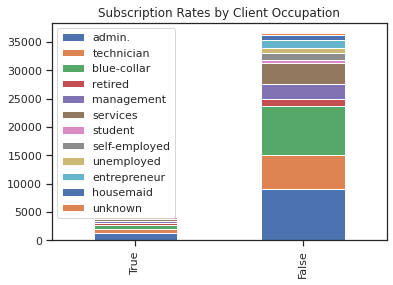

In [47]:
# Stacked barplot featuring jobs
subscribed = df2.loc[df2['y']==True, :]['job'].value_counts()
not_subscribed = df2.loc[df2['y']==False, :]['job'].value_counts()
df_plot  = pd.DataFrame([subscribed,not_subscribed])
df_plot.index=['True','False']

# Plot
df_plot.plot(kind='bar',stacked=True,title=('Subscription Rates by Client Occupation'))

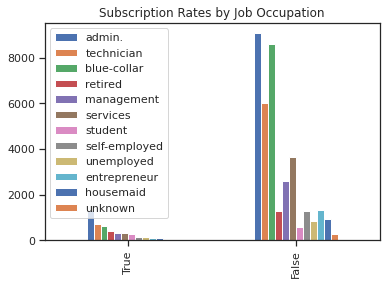

In [48]:
subscribed = df2.loc[df2['y']==True, :]['job'].value_counts()
not_subscribed = df2.loc[df2['y']==False, :]['job'].value_counts()
df_plot  = pd.DataFrame([subscribed,not_subscribed])
df_plot.index=['True','False']

# Plot
df_plot.plot(kind='bar',stacked=False, title='Subscription Rates by Job Occupation')

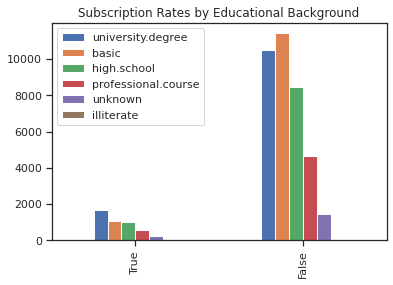

In [49]:
subscribed = df2.loc[df2['y']==True, :]['education'].value_counts()
not_subscribed = df2.loc[df2['y']==False, :]['education'].value_counts()
df_plot  = pd.DataFrame([subscribed,not_subscribed])
df_plot.index=['True','False']

# Plot
df_plot.plot(kind='bar',stacked=False, title='Subscription Rates by Educational Background')


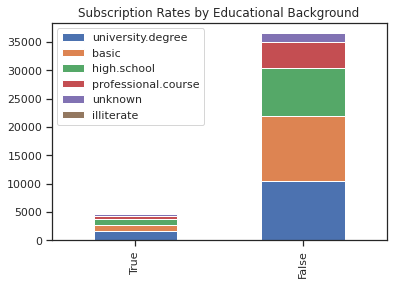

In [50]:
# Stacked barplot of education
subscribed = df2.loc[df2['y']==True, :]['education'].value_counts()
not_subscribed = df2.loc[df2['y']==False, :]['education'].value_counts()
df_plot  = pd.DataFrame([subscribed,not_subscribed])
df_plot.index=['True','False']

# Plot
df_plot.plot(kind='bar',stacked=True, title='Subscription Rates by Educational Background');

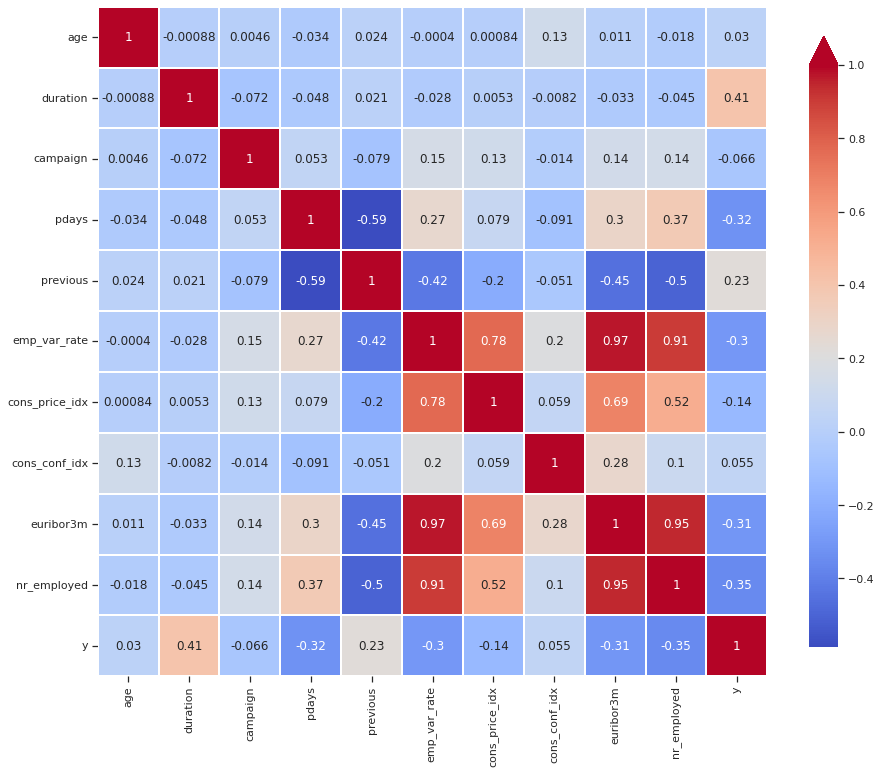

In [51]:
corr = df1.corr()
plt.figure(figsize=(15,15))
cbar_kws = {"orientation":"vertical", 
            "shrink":.75,
            'extend':'max', 
            "drawedges":False,
           }
sns.heatmap(corr, annot = True,cmap='coolwarm', linewidths = 1, square=True, cbar_kws=cbar_kws)
plt.show()

In [52]:
X=df.drop(['y'],axis = 1)
y=df['y']

In [53]:
df_numeric_feat = X.select_dtypes(include = np.number)

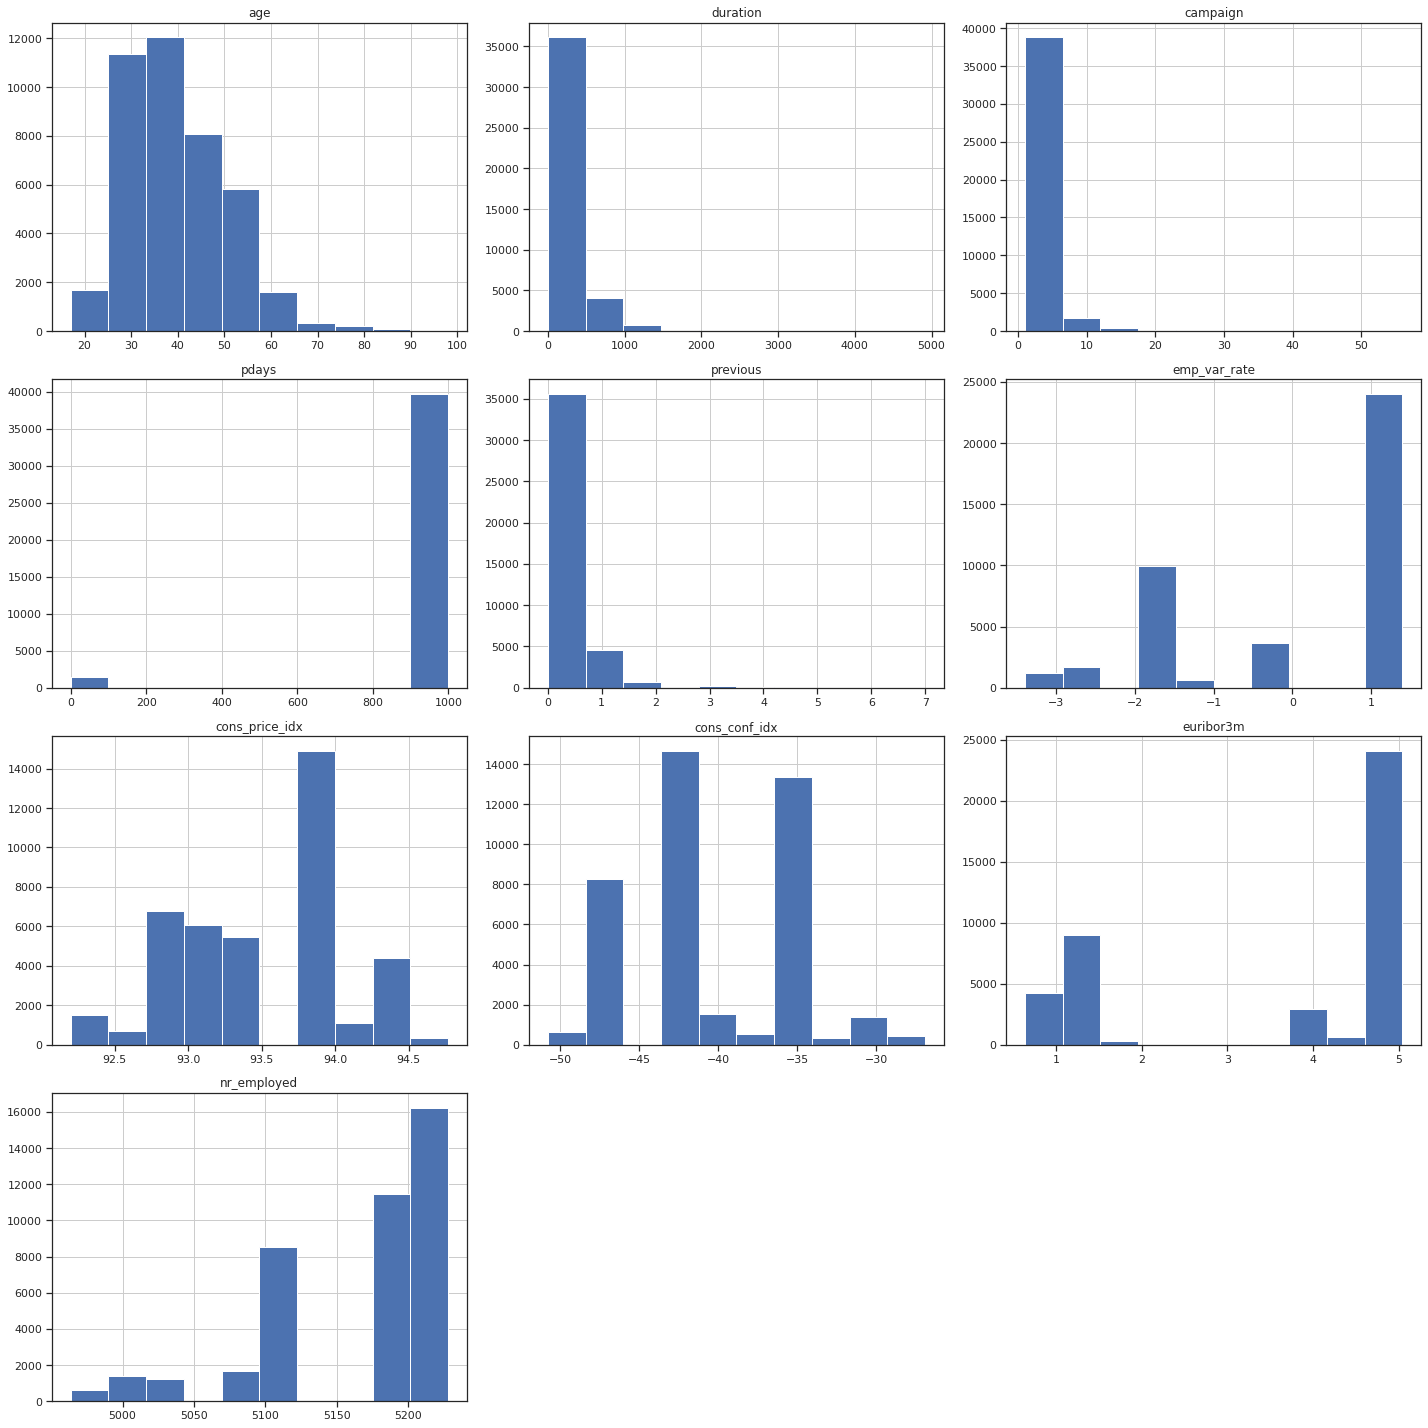

In [54]:
df1.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

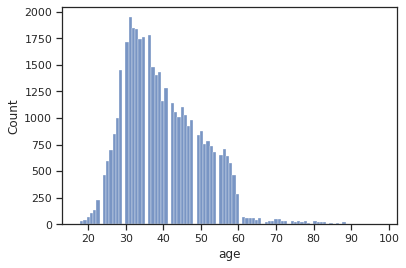

In [55]:
sns.histplot(df2['age'])
plt.show()

# Section IV : Categorical Variable Encoding
1. Create dummy variables for your categorial variables
2. Explore your new dataset with these new dummy variables 

In [56]:
df_cat_feat = df2.select_dtypes(include = object) # creating a dataframe of the categorical features only
df_cat_feat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [57]:
df_categoric_features = df1.select_dtypes(include = object)
df_categoric_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [58]:
dummy_variables = pd.get_dummies(df_cat_feat, drop_first = True)

dummy_variables

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
41184,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
41185,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
41186,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0


In [59]:
df2 = pd.concat([df_numeric_feat, dummy_variables], axis=1)

In [60]:
df2.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,0,0,0,1


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

In [62]:
X=df2

In [63]:
y.dtypes

dtype('bool')

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
print('Dimension of train_x dataframe:',X_train.shape)
print('Dimension of train_y dataframe:',y_train.shape)
print('Dimension of val_x dataframe:',X_test.shape)
print('Dimension of val_y dataframe:',y_test.shape)

Dimension of train_x dataframe: (32950, 51)
Dimension of train_y dataframe: (32950,)
Dimension of val_x dataframe: (8238, 51)
Dimension of val_y dataframe: (8238,)


In [67]:
#Training the model
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [68]:
predictions = model.predict(X_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

[False False False ... False False False]

              precision    recall  f1-score   support

       False       0.93      0.98      0.95      7307
        True       0.68      0.41      0.51       931

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [69]:
print( "Accuracy of Model =",accuracy_score(y_test, predictions))

Accuracy of Model = 0.911750424860403




---



---



In [70]:
y.value_counts(normalize=True) 

False    0.887346
True     0.112654
Name: y, dtype: float64

In [71]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
oversample_data_X,oversample_data_y=oversample.fit_resample(X_train, y_train)


In [72]:
oversample_data_X = pd.DataFrame(data=oversample_data_X,columns=columns )
oversample_data_y= pd.DataFrame(data=oversample_data_y,columns=['y'])

In [73]:
print("the length of oversampled data is ",len(oversample_data_X))
print("Number of not subscribed in oversampled data is",len(oversample_data_y[oversample_data_y['y']==0]))
print("Number of subscribed is",len(oversample_data_y[oversample_data_y['y']==1]))
print("Proportion of not subscribed data in oversampled data is ",len(oversample_data_y[oversample_data_y['y']==0])/len(oversample_data_X))
print("Proportion of subscribed data in oversampled data is ",len(oversample_data_y[oversample_data_y['y']==1])/len(oversample_data_X))

the length of oversampled data is  51134
Number of not subscribed in oversampled data is 25567
Number of subscribed is 25567
Proportion of not subscribed data in oversampled data is  0.5
Proportion of subscribed data in oversampled data is  0.5


In [74]:
df2['y']=df1['y']

In [75]:
df2.y

0        False
1        False
2         True
3        False
4         True
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Name: y, Length: 41188, dtype: bool

re-train: section vii

In [76]:
from sklearn.metrics import classification_report
from sklearn import metrics
clf1 = LogisticRegression(random_state=12)
clf1.fit(X_train, y_train)
y_pred1=clf1.predict(X_train)
print(metrics.confusion_matrix(y_train, y_pred1))
print(metrics.classification_report(y_train, y_pred1))

[[24885   682]
 [ 1956  1308]]
              precision    recall  f1-score   support

       False       0.93      0.97      0.95     25567
        True       0.66      0.40      0.50      3264

    accuracy                           0.91     28831
   macro avg       0.79      0.69      0.72     28831
weighted avg       0.90      0.91      0.90     28831



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [77]:
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(y_train, y_pred1)
print("Accuracy of the model : ", logreg_acc)

Accuracy of the model :  0.9085012659984045


section viii

In [78]:
X_test = pd.DataFrame(X_test, columns=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic 6y', 'education_basic 9y',
       'education_high school', 'education_illiterate',
       'education_professional course', 'education_university degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'])

In [79]:
X_train = pd.DataFrame(oversample_data_X, columns=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic 6y', 'education_basic 9y',
       'education_high school', 'education_illiterate',
       'education_professional course', 'education_university degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success'])
y_train = pd.DataFrame(oversample_data_y, columns=['y'])

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
result=logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [81]:
y_pred = logreg.predict(X_test)
print('Accuracy of a regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of a regression classifier on test set: 0.99


In [82]:
print( "The accuracy of the Model",accuracy_score(y_test, y_pred))

The accuracy of the Model 0.9872946508052116


In [83]:
print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99     10981
        True       0.94      0.95      0.94      1376

    accuracy                           0.99     12357
   macro avg       0.97      0.97      0.97     12357
weighted avg       0.99      0.99      0.99     12357

